In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np
import wrangle
import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, split_data, prep_string_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.get_npr_data()
df.head()

The df has 2998347 rows and 10 columns.


,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date
episode_id,,,,,,,,,,
57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12
57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12
57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12
57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12
57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12


## Is there a difference in the mean sentiment by speaker? Program? etc
- Applied statistics-> i.e. stats testing. Is there a difference in the mean sentiment by speaker? Program? etc 

In [3]:
df.columns

Index(['episode_order', 'speaker', 'utterance', 'program', 'title', 'is_host',
       'clean', 'lemmatized_stopped', 'vader_stopped', 'date'],
      dtype='object')

In [4]:
df.shape

(2998347, 10)

In [5]:
df.dtypes

episode_order           int64
speaker                object
utterance              object
program                object
title                  object
is_host                  bool
clean                  object
lemmatized_stopped     object
vader_stopped         float64
date                   object
dtype: object

In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df.dtypes

episode_order                  int64
speaker                       object
utterance                     object
program                       object
title                         object
is_host                         bool
clean                         object
lemmatized_stopped            object
vader_stopped                float64
date                  datetime64[ns]
dtype: object

In [8]:

# df['Date'].dt.strftime('%b-%Y')

# df['episode_date'].dt.strftime('%b')

In [9]:
df['month']=df['date'].dt.strftime('%b')
df['year']=pd.DatetimeIndex(df['date']).year
df=df.reset_index()
df.head()

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date,month,year
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12,Jul,2010
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12,Jul,2010
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12,Jul,2010
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12,Jul,2010
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12,Jul,2010


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=df.set_index('date').sort_index()

In [12]:
df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
1999-01-08,141179,9,ISABELLE DELUCA,"Yes. It's like my soul sings, I see Rio de Jan...",All Things Considered,Airport Samba,False,yes. it s like my soul sings i see rio de jani...,yes. like soul sings see rio de janiero miss m...,0.5994,Jan,1999


In [13]:
host_df = df[df.is_host==True]

In [14]:
host_df.shape

(632305, 12)

In [15]:
# are there repeats in the host_df? 
host_df.speaker.value_counts()

NEAL CONAN, host         204935
IRA FLATOW, host          58172
FARAI CHIDEYA, host       36462
MADELEINE BRAND, host     26313
ROBERT SIEGEL, host       23846
                          ...  
RENEEE MONTAGNE, host         1
Melissa Block, host           1
AN, host                      1
RENEE INSKEEP, host           1
ALEXCHADWICK, host            1
Name: speaker, Length: 236, dtype: int64

- I can see two different duplicates for steve inskeep bc of typos
- I think this is going to fall into the arena of significantly diminishing returns, and I will not address it at this time

In [16]:
hosts_with_the_most = host_df.speaker.value_counts().head(12).index.to_list()

- This is a list of the 12 hosts with the most observations

In [17]:
hosts_with_the_most

['NEAL CONAN, host',
 'IRA FLATOW, host',
 'FARAI CHIDEYA, host',
 'MADELEINE BRAND, host',
 'ROBERT SIEGEL, host',
 'STEVE INSKEEP, host',
 'ALEX CHADWICK, host',
 'MELISSA BLOCK, host',
 'RENEE MONTAGNE, host',
 'GUY RAZ, host',
 'ED GORDON, host',
 'MICHELE NORRIS, host']

In [18]:
top_hosts_df = df[df.speaker.isin(hosts_with_the_most)]

In [19]:
top_hosts_df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
2004-06-07,135286,35,"STEVE INSKEEP, host",The time is 29 minutes past the hour.,Morning Edition,Study Sheds Light on Compulsive Hoarding,True,the time is 29 minutes past the hour .,time 29 minute past hour .,0.0,Jun,2004


In [21]:
top_hosts_df.index.min(), top_hosts_df.index.max()

(Timestamp('2004-06-07 00:00:00'), Timestamp('2011-11-10 00:00:00'))

In [22]:
top_hosts_df.vader_stopped.mean()

0.16464489271365054

- Here, we have the average sentiment score for all the top hosts; as you can see, it is relatively neutral in sentiment

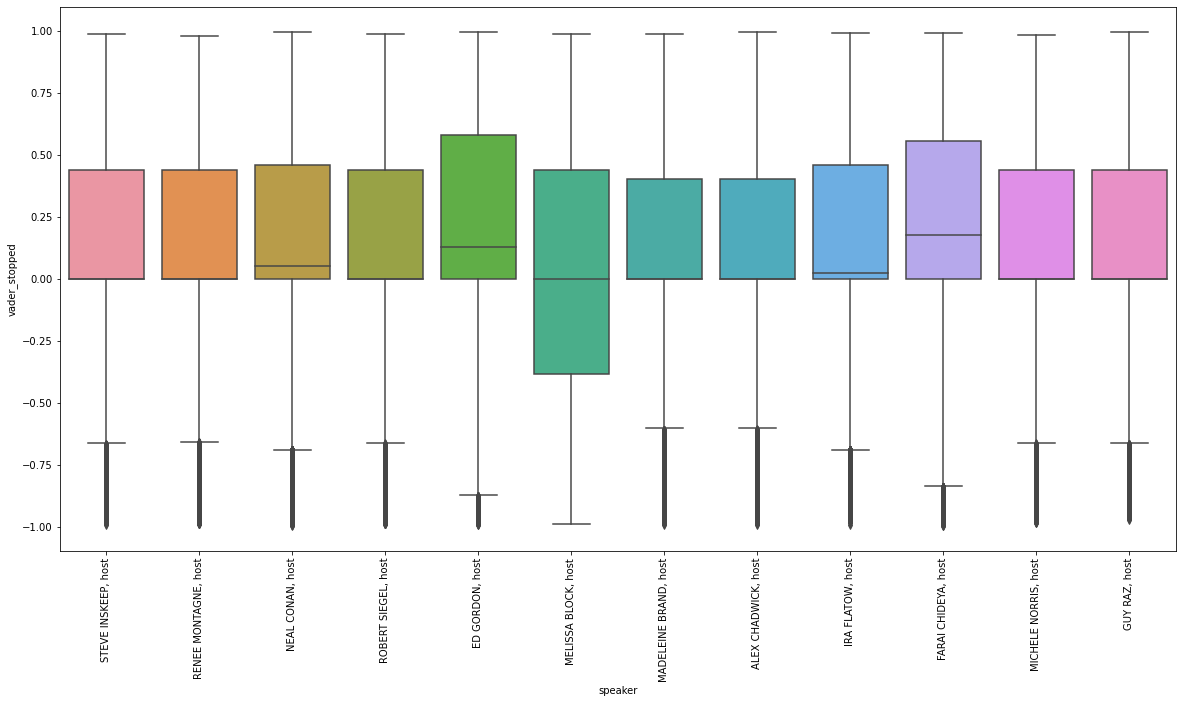

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=top_hosts_df, x='speaker',y='vader_stopped')
plt.xticks(rotation=90);

- The mean sentiment value is awfully close for everyone here, so i'm going to stats test it with an ANOVA test

In [24]:
null_hypothesis = "Average sentiment score is the same across hosts"
alternative_hypothesis = "Average sentiment score is different in at least one host of the group"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [25]:
host_df_list=[]
for host in hosts_with_the_most:
    x = host.split()
    host_df_list.append(f'{x[0]}_df')
print(host_df_list)

['NEAL_df', 'IRA_df', 'FARAI_df', 'MADELEINE_df', 'ROBERT_df', 'STEVE_df', 'ALEX_df', 'MELISSA_df', 'RENEE_df', 'GUY_df', 'ED_df', 'MICHELE_df']


In [26]:
# Let's isolate our hosts
NEAL_df = df[df.speaker == 'NEAL CONAN, host'].vader_stopped
IRA_df = df[df.speaker == 'IRA FLATOW, host'].vader_stopped
FARAI_df = df[df.speaker == 'FARAI CHIDEYA, host'].vader_stopped
MADELEINE_df = df[df.speaker == 'MADELEINE BRAND, host'].vader_stopped
ROBERT_df = df[df.speaker == 'ROBERT SIEGEL, host'].vader_stopped
STEVE_df = df[df.speaker == 'STEVE INSKEEP, host'].vader_stopped
ALEX_df = df[df.speaker == 'ALEX CHADWICK, host'].vader_stopped
MELISSA_df = df[df.speaker == 'MELISSA BLOCK, host'].vader_stopped
RENEE_df = df[df.speaker == 'RENEE MONTAGNE, host'].vader_stopped
GUY_df = df[df.speaker == 'GUY RAZ, host'].vader_stopped
ED_df = df[df.speaker == 'ED GORDON, host'].vader_stopped
MICHELE_df = df[df.speaker == 'MICHELE NORRIS, host'].vader_stopped

In [29]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(NEAL_df, IRA_df, FARAI_df, MADELEINE_df, ROBERT_df, STEVE_df, ALEX_df, MELISSA_df, RENEE_df, GUY_df, ED_df, MICHELE_df)
f, p

(517.9704631307725, 0.0)

In [28]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that sentiment differs from host to host")

We reject the null hypothesis that Average sentiment score is the same across hosts
We move forward with the alternative hypothesis that Average sentiment score is different in at least one host of the group


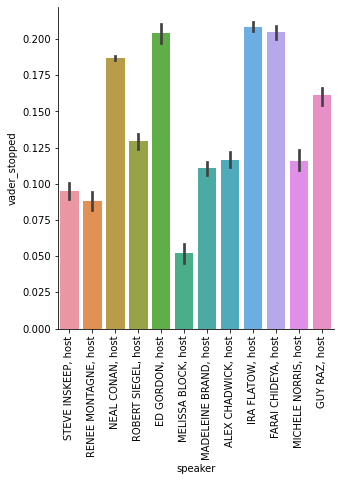

In [30]:
sns.catplot(x="speaker", y="vader_stopped", kind="bar", data=top_hosts_df)
plt.xticks(rotation=90);

- Another view of the same...it looks more clear here that there is a difference, however note the small scale on the y axis

In [32]:
top_hosts_df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
2004-06-07,135286,35,"STEVE INSKEEP, host",The time is 29 minutes past the hour.,Morning Edition,Study Sheds Light on Compulsive Hoarding,True,the time is 29 minutes past the hour .,time 29 minute past hour .,0.0,Jun,2004


### The conclusion to the above is that there is a statistically significant difference in sentiment in the top hosts group, even if it is small.

## What's the difference in sentiment score between hosts and non-hosts?

In [34]:
non_host_df = df[df.is_host==False]

Text(0, 0.5, 'Mean Sentiment Score')

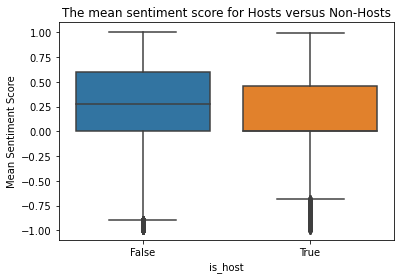

In [41]:
plt.figure
sns.boxplot(data=df, x='is_host',y='vader_stopped')
plt.title("The mean sentiment score for Hosts versus Non-Hosts")
plt.ylabel("Mean Sentiment Score")


In [43]:
df[df.is_host==False].vader_stopped.mean(), df[df.is_host==True].vader_stopped.mean()

(0.21032103432649124, 0.169954442080901)

In [100]:
null_hypothesis = "Hosts and Non-hosts have the same sentiment score"
alternative_hypothesis = "Hosts and Non-hosts have different sentiment scores"
alpha = 0.01 # we want to be 99% sure our results aren't the result of chance/randomness

In [101]:
#stats testing on the same
# anova is the wrong test!
from scipy import stats

t, p = stats.ttest_ind(host_df.vader_stopped,non_host_df.vader_stopped)
t, p

(-61.10950921647146, 0.0)

In [104]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print(f"Evidence does not support the claim that", alternate_hypothesis)

We reject the null hypothesis that Hosts and Non-hosts have the same sentiment score
We move forward with the hypothesis that Hosts and Non-hosts have different sentiment scores


### The average sentiment score for non-hosts is somewhat higher than for the hosts.  To be expected for a relatively neutral news outlet?

## How about sentiment score by year?

In [47]:
df.resample('Y').vader_stopped.mean()

date
1999-12-31    0.422604
2000-12-31         NaN
2001-12-31         NaN
2002-12-31         NaN
2003-12-31         NaN
2004-12-31    0.225032
2005-12-31    0.195450
2006-12-31    0.186313
2007-12-31    0.199343
2008-12-31    0.231347
2009-12-31    0.222994
2010-12-31    0.212010
2011-12-31    0.201472
2012-12-31    0.220675
2013-12-31    0.191282
2014-12-31    0.161404
2015-12-31    0.168365
2016-12-31    0.190552
2017-12-31    0.199584
2018-12-31    0.191288
2019-12-31    0.186786
Freq: A-DEC, Name: vader_stopped, dtype: float64

- why don't we have vader scores in 2000-2003 on yearly resampling?

In [48]:
vader_yearly = pd.DataFrame(df.resample('Y').vader_stopped.mean())

<AxesSubplot:xlabel='date'>

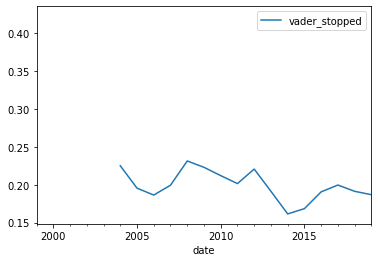

In [50]:
vader_yearly.plot()

In [51]:
vader_monthly = pd.DataFrame(df.resample('M').vader_stopped.mean())

In [52]:
vader_monthly.head()

,vader_stopped
date,
1999-01-31,0.422604
1999-02-28,NaN
1999-03-31,NaN
1999-04-30,NaN
1999-05-31,NaN


<AxesSubplot:xlabel='date'>

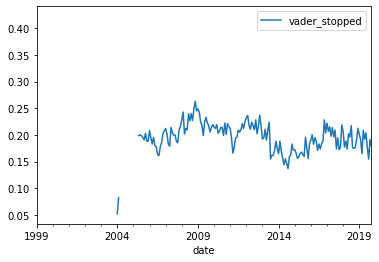

In [53]:
vader_monthly.plot()

- What's with all those missing sentiment scores in the early aughts?

In [58]:
# df[df.year==2001]#.vader_stopped
df.head()

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
1999-01-08,141179,9,ISABELLE DELUCA,"Yes. It's like my soul sings, I see Rio de Jan...",All Things Considered,Airport Samba,False,yes. it s like my soul sings i see rio de jani...,yes. like soul sings see rio de janiero miss m...,0.5994,Jan,1999
1999-01-08,141179,2,NOAH ADAMS,You mentioned the Airport Samba?,All Things Considered,Airport Samba,False,you mentioned the airport samba ?,mentioned airport samba ?,0.0000,Jan,1999
1999-01-08,141179,3,ISABELLE DELUCA,Yes.,All Things Considered,Airport Samba,False,yes .,yes .,0.4019,Jan,1999
1999-01-08,141179,4,NOAH ADAMS,Written by Mr. Jobim.,All Things Considered,Airport Samba,False,written by mr. jobim .,written mr. jobim .,0.0000,Jan,1999
1999-01-08,141179,5,ISABELLE DELUCA,Yes.,All Things Considered,Airport Samba,False,yes .,yes .,0.4019,Jan,1999


In [59]:
vader_monthly.head(1)

,vader_stopped
date,
1999-01-31,0.422604


In [64]:
# pd.DataFrame(df.resample("d").vader_stopped.mean()).plot()

## And by program?

In [65]:
df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
1999-01-08,141179,9,ISABELLE DELUCA,"Yes. It's like my soul sings, I see Rio de Jan...",All Things Considered,Airport Samba,False,yes. it s like my soul sings i see rio de jani...,yes. like soul sings see rio de janiero miss m...,0.5994,Jan,1999


In [73]:
df.program.value_counts().index.to_list()

['Talk of the Nation',
 'All Things Considered',
 'Morning Edition',
 'News & Notes',
 'Day to Day',
 'Weekend Edition Sunday',
 'Weekend Edition Saturday']

In [76]:
Talk_of_the_Nation_df = df[df.program == 'Talk of the Nation']
All_Things_Considered_df = df[df.program == 'All Things Considered']
Morning_Edition_df = df[df.program == 'Morning Edition']
News_and_Notes_df = df[df.program == 'News & Notes']
Day_to_Day_df = df[df.program == 'Day to Day']
Weekend_Edition_Sunday_df = df[df.program == 'Weekend Edition Sunday']
Weekend_Edition_Saturday_df = df[df.program == 'Weekend Edition Saturday']

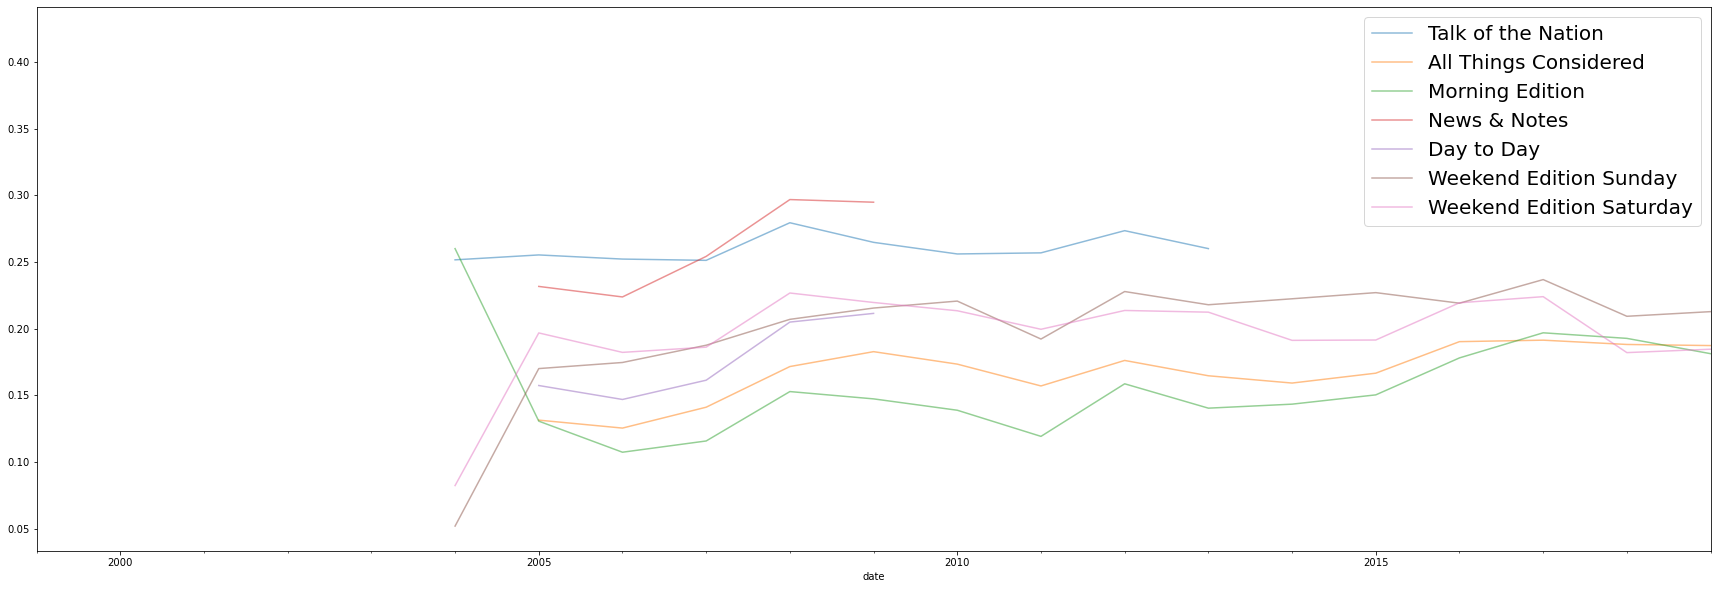

In [99]:
plt.figure(figsize=(30,10))
Talk_of_the_Nation_df.resample("y").vader_stopped.mean().plot(alpha=.5)
All_Things_Considered_df.resample("y").vader_stopped.mean().plot(alpha=.5)
Morning_Edition_df.resample("y").vader_stopped.mean().plot(alpha=.5)
News_and_Notes_df.resample("y").vader_stopped.mean().plot(alpha=.5)
Day_to_Day_df.resample("y").vader_stopped.mean().plot(alpha=.5)
Weekend_Edition_Sunday_df.resample("y").vader_stopped.mean().plot(alpha=.5)
Weekend_Edition_Saturday_df.resample("y").vader_stopped.mean().plot(alpha=.5)
plt.legend(['Talk of the Nation',
 'All Things Considered',
 'Morning Edition',
 'News & Notes',
 'Day to Day',
 'Weekend Edition Sunday',
 'Weekend Edition Saturday'], prop={'size': 20})

- What I am mostly seeing is a lot of missing data :( 
- Also, though, there is some difference in sentiment from program to program
- Weekend Edition (Sat and Sun) have higher sentiment scores--these programs try to be a little on the lighter side for the weekend

In [106]:
null_hypothesis = "The different programs have the same sentiment score"
alternative_hypothesis = "At least one program has a different sentiment score"
alpha = 0.01 # we want to be 99% sure our results aren't the result of chance/randomness

In [107]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(Talk_of_the_Nation_df.vader_stopped,
All_Things_Considered_df.vader_stopped,
Morning_Edition_df.vader_stopped,
News_and_Notes_df.vader_stopped,
Day_to_Day_df.vader_stopped,
Weekend_Edition_Sunday_df.vader_stopped,
Weekend_Edition_Saturday_df.vader_stopped,)
f, p

(4875.602377789401, 0.0)

In [108]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that sentiment differs from host to host")

We reject the null hypothesis that The different programs have the same sentiment score
We move forward with the alternative hypothesis that At least one program has a different sentiment score


In [109]:
df.head()

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
1999-01-08,141179,9,ISABELLE DELUCA,"Yes. It's like my soul sings, I see Rio de Jan...",All Things Considered,Airport Samba,False,yes. it s like my soul sings i see rio de jani...,yes. like soul sings see rio de janiero miss m...,0.5994,Jan,1999
1999-01-08,141179,2,NOAH ADAMS,You mentioned the Airport Samba?,All Things Considered,Airport Samba,False,you mentioned the airport samba ?,mentioned airport samba ?,0.0000,Jan,1999
1999-01-08,141179,3,ISABELLE DELUCA,Yes.,All Things Considered,Airport Samba,False,yes .,yes .,0.4019,Jan,1999
1999-01-08,141179,4,NOAH ADAMS,Written by Mr. Jobim.,All Things Considered,Airport Samba,False,written by mr. jobim .,written mr. jobim .,0.0000,Jan,1999
1999-01-08,141179,5,ISABELLE DELUCA,Yes.,All Things Considered,Airport Samba,False,yes .,yes .,0.4019,Jan,1999


## what about clustering?
- There is very little continuous data here, clusering might not be possible.
- datetime...but how usefull can that be? 
- utterance order? is that available?

In [112]:
df.sort_values(by=['episode_id','episode_order'])[0:50]

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
2019-10-06,1,1,"LULU GARCIA-NAVARRO, HOST",The impeachment inquiry picks up tomorrow wher...,Weekend Edition Sunday,Sunday Politics,False,the impeachment inquiry picks up tomorrow wher...,impeachment inquiry pick tomorrow left friday ...,-0.5267,Oct,2019
2019-10-06,1,2,"LULU GARCIA-NAVARRO, HOST",Good morning.,Weekend Edition Sunday,Sunday Politics,False,good morning .,good morning .,0.4404,Oct,2019
2019-10-06,1,3,"MARA LIASSON, BYLINE","Good morning, Lulu.",Weekend Edition Sunday,Sunday Politics,False,good morning lulu .,good morning lulu .,0.4404,Oct,2019
2019-10-06,1,4,"LULU GARCIA-NAVARRO, HOST",All right. What's the latest?,Weekend Edition Sunday,Sunday Politics,False,all right. what s the latest ?,right. latest ?,0.0000,Oct,2019
2019-10-06,1,5,"MARA LIASSON, BYLINE","Well, the latest is that the lawyer for the fi...",Weekend Edition Sunday,Sunday Politics,False,well the latest is that the lawyer for the fir...,well latest lawyer first whistleblower tweetin...,0.8402,Oct,2019
2019-10-06,1,6,"LULU GARCIA-NAVARRO, HOST","I mean, another whistleblower has got to be ba...",Weekend Edition Sunday,Sunday Politics,False,i mean another whistleblower has got to be bad...,mean another whistleblower ha got bad news pre...,0.1027,Oct,2019
2019-10-06,1,7,"MARA LIASSON, BYLINE",No. This is kind of like a trail of bread crum...,Weekend Edition Sunday,Sunday Politics,False,no. this is kind of like a trail of bread crum...,no. kind like trail bread crumbs. revelation l...,0.9153,Oct,2019
2019-10-06,1,8,"LULU GARCIA-NAVARRO, HOST",What his happening to his support among Republ...,Weekend Edition Sunday,Sunday Politics,False,what his happening to his support among republ...,happening support among republican lawmaker ma...,0.6662,Oct,2019
2019-10-06,1,9,"MARA LIASSON, BYLINE","So far, most Republican lawmakers are shelteri...",Weekend Edition Sunday,Sunday Politics,False,so far most republican lawmakers are shelterin...,far republican lawmaker sheltering place usual...,-0.6705,Oct,2019


### Ok, for the first time I'm seeing clearly how the episodes are in fact ordered by 'story' (episode_id) and then ordered by utterance within the story

### This is great, bc it's what is going to make topic modeling possible down the line

# First...
- Let's do a tsa model of sentiment using Prophet : )